In [1]:
import pandas as pd
import numpy
import csv
import seaborn
import numpy as np

percentile = 0.98

In [2]:
file_path = "/home/rokas/eufs/system_id/csvs/sim_verify_acc=1_yaw_incl_2020-06-04-19-18-09/_slash_ground_truth_slash_car_info.csv"
df = pd.read_csv(file_path)

In [3]:
df.columns

Index(['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs',
       'frame_id', 'delta', 'acc', 'current_v_x', 'current_v_y', 'current_r',
       'current_yaw', 'front_slip_angle', 'rear_slip_angle', 'next_v_x',
       'next_v_y', 'next_r', 'next_yaw', 'dt'],
      dtype='object')

In [5]:
print(df.current_v_x.quantile(percentile))
print(df.current_v_y.quantile(percentile))
print(df.current_r.quantile(percentile))

14.504713880579986
1.0856513528679994
1.7879828946459992


In [7]:
df_filtered = df

df_filtered = df_filtered[df_filtered.current_v_y / df_filtered.current_v_x < 0.75]
# df_filtered = df[df.current_v_x > 1]

df_filtered = df_filtered[df_filtered.current_v_x < df_filtered.current_v_x.quantile(percentile)]
df_filtered = df_filtered[df_filtered.current_v_y < df_filtered.current_v_y.quantile(percentile)]
df_filtered = df_filtered[df_filtered.current_r < df_filtered.current_r.quantile(percentile)]

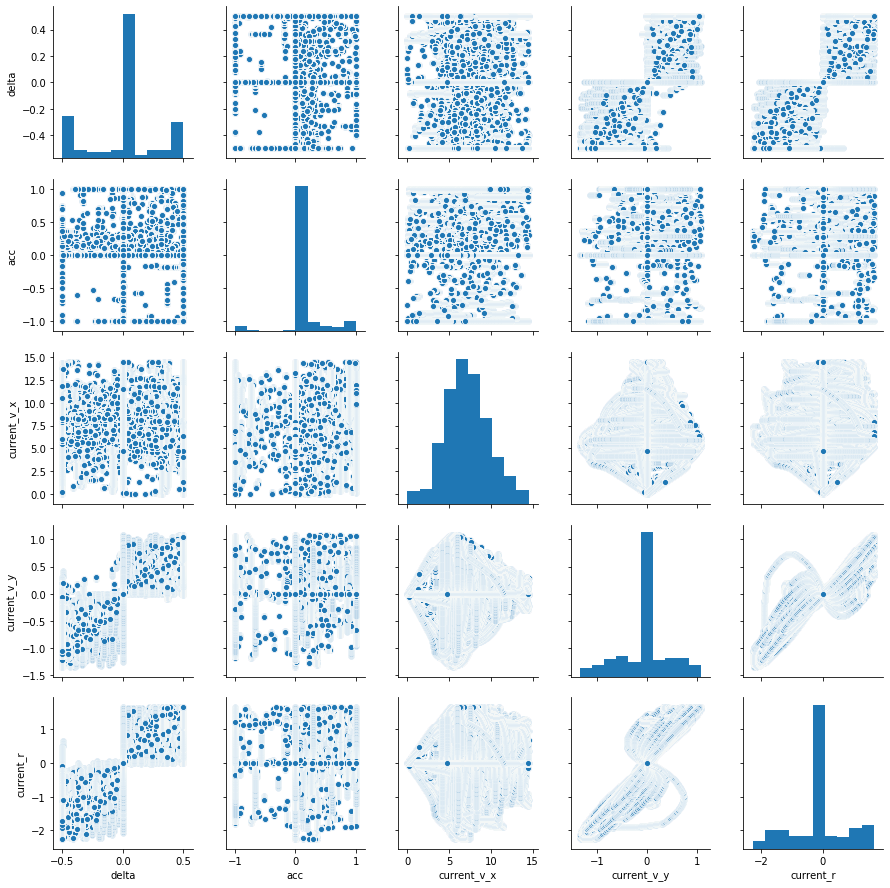

In [8]:
seaborn.pairplot(df_filtered[['delta', 'acc', 'current_v_x', 'current_v_y', 'current_r']])

In [9]:
vx_dot = (np.array(df_filtered['next_v_x']) - np.array(df_filtered['current_v_x']))/0.001    
vy_dot = (np.array(df_filtered['next_v_y']) - np.array(df_filtered['current_v_y']))/0.001
r_dot = (np.array(df_filtered['next_r']) - np.array(df_filtered['current_r']))/0.001

In [10]:
df_dot = pd.DataFrame()
df_dot['acc'] = df_filtered['acc']
df_dot['delta'] = df_filtered['delta']
df_dot['vx_dot'] = vx_dot
df_dot['vy_dot'] = vy_dot
df_dot['r_dot'] = r_dot

# df_dot = pd.DataFrame()

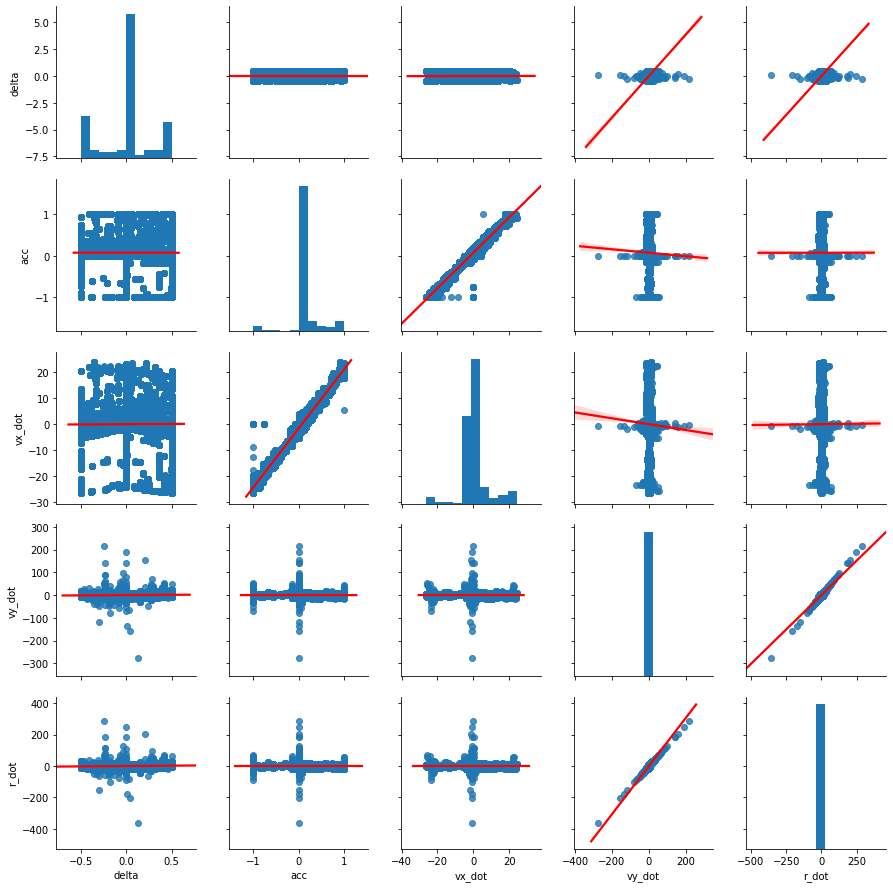

In [12]:
seaborn.pairplot(df_dot[['delta', 'acc', 'vx_dot', 'vy_dot', 'r_dot']], kind="reg", plot_kws={'line_kws':{'color':'red'}})